# 1.Задача поиска максимального подмассива

Допустим, мы знаем цены акций наперед. Наша задача - максимизировать прибыль, купив подешевле, а продав - подороже.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = [100, 113, 110, 85, 105, 102, 86, 63, 81, 101, 94, 106, 101, 79, 94, 90, 79]

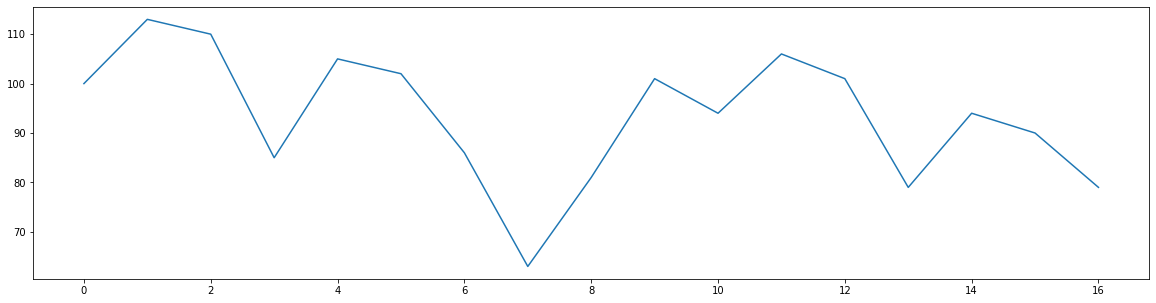

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(data)

Сначала попробуем грубой силой - перебираем все цены от первой до предпоследней и к каждой такой цене ищем пару из будущего, обеспечивающую максимальную разницу между ценой покупки и продажи. Сложность у такого алгоритма, понятно, равна $O(n^2)$.

In [4]:
def get_max_subarray_bruteforce(data: list[int]) -> (int, int):
    buy_day = 0 
    sell_day = len(data) - 1
    max_diff = data[sell_day] - data[buy_day]
    for i in range(len(data) - 1):
        for j in range(i + 1, len(data)):
            if (data[j] - data[i]) > max_diff:
                max_diff = data[j] - data[i]
                buy_day, sell_day = i, j
    return buy_day, sell_day

In [5]:
buy_day, sell_day = get_max_subarray_bruteforce(data)
print(f'buy_day = {buy_day}, sell_day = {sell_day}, profit = {data[sell_day] - data[buy_day]}')

buy_day = 7, sell_day = 11, profit = 43


Немножко отвлечемся на обозначения асимптотической сложности алгоритмов.

1. Обозначение $\Theta(g(n))$ говорит нам, что существуют такие положительные константы $c_1$ и $c_2$, что 
$$0 \le c_1g(n) \le f(n) \le c_2g(n)$$ для всех $n \gt n_0$, где $f(n)$ - это реальное время выполнения алгоритма. Говоря менее формально, $\Theta(g(n))$ показывает асимптотическую сложность алгоритма, ограничивая ее и сверху и снизу.

2. Обозначение $O(g(n))$ показывает асимптотическую сложность алгоритма, ограничивая ее только сверху, т.е. в данном случае зависимость $g(n)$ - это наихудший из вариантов.

3. Обозначение $\Omega(g(n))$ показывает асимптотическую сложность алгоритма, ограничивая ее только снизу, т.е. в данном случае зависимость $g(n)$ - это наилучший из вариантов.

4. Обозначение $o(g(n))$ показывает неточную верхнюю оценку асимптотической сложности алгоритма. Так, например, если запись $2n = O(n^2)$ является неправильной, то запись $2n = o(n^2)$ является абсолютно корректной.

5. Обозначение $\omega(g(n))$ показывает неточную нижнюю оценку асимптотической сложности алгоритма.

In [6]:
subdata = data[7:14]
subdata

[63, 81, 101, 94, 106, 101, 79]

In [7]:
delta = [subdata[i] - subdata[i - 1] for i in range(1, len(subdata))]
delta

[18, 20, -7, 12, -5, -22]

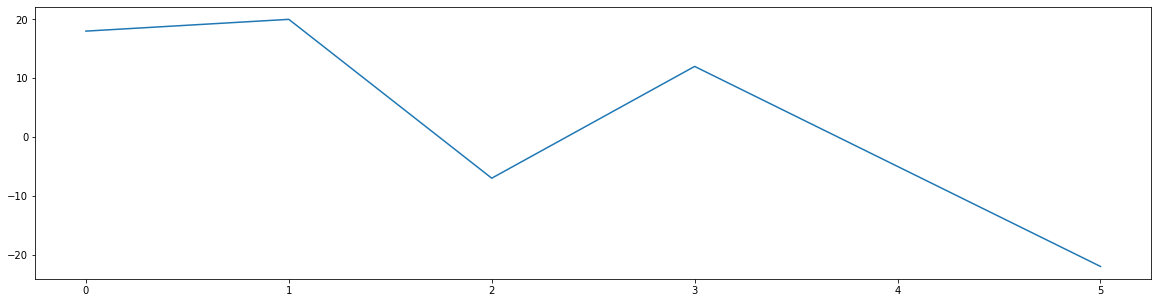

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(delta)

In [9]:
subdata

[63, 81, 101, 94, 106, 101, 79]

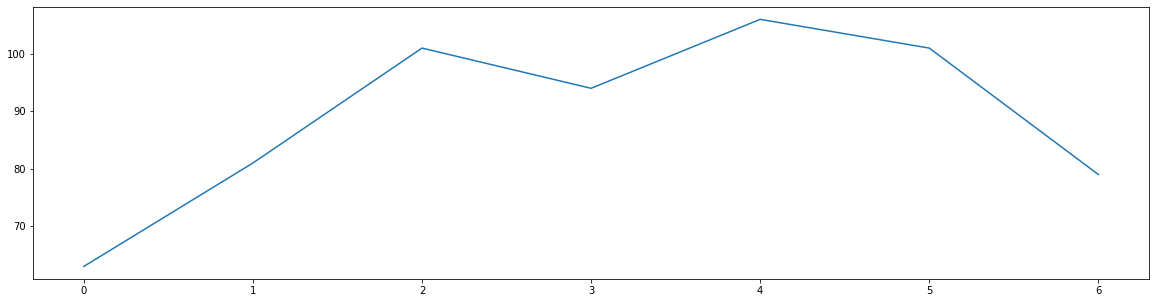

In [10]:
plt.figure(figsize=(20, 5))
plt.plot(subdata)

In [11]:
get_max_subarray_bruteforce(subdata)

(0, 4)

In [12]:
def get_max_subarray_middle(data: list[int]) -> (int, int):    
    max_sum = sum(data)
    l_res, r_res = 0, len(data) - 1
    section = len(data) // 2
    for i in range(section):
        if (max_sum - data[i]) > max_sum:
            l_res, max_sum = i, max_sum - data[i]
        #else:
        #    break
    for j in range(len(data) - 1, section - 1, -1):
        if (max_sum - data[j]) > max_sum:
            r_res, max_sum = j, max_sum - data[j]
        #else:
        #    break
    return (l_res, r_res)

In [18]:
delta = [subdata[i] - subdata[i - 1] for i in range(1, len(subdata))]
l, h = get_max_subarray_middle(delta)
print(f'({l}, {h}), sum = {sum(delta[l:h])}')

(2, 4), sum = 5


In [14]:
def get_max_subarray_logn(data: list[int]) -> (int, int):
    if(len(data) == 1):
        return (0, 1)
    section = len(data) // 2
    middle_l, middle_h = get_max_subarray_middle(data)
    left_l, left_h = get_max_subarray_logn(data[:section])
    right_l, right_h = get_max_subarray_logn(data[section:])
    right_l += section
    right_h += section
    max_sum = sum(data[middle_l:middle_h])
    l, r = middle_l, middle_h
    if max_sum < sum(data[left_l:left_h]):
        max_sum = sum(data[left_l:left_h])
        l, r = left_l, left_h
    elif max_sum < sum(data[right_l:right_h]):
        max_sum = sum(data[right_l:right_h])
        l, r = right_l, right_h
    return (l, r)

In [15]:
data = [100, 113, 110, 85, 105, 102, 86, 63, 81, 101, 94, 106, 101, 79, 94, 90, 79]
delta = [data[i] - data[i - 1] for i in range(1, len(data))]
get_max_subarray_logn(delta)

(8, 9)